# I) Préparation de données


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ScoringTraining=pd.read_csv(r"C:\\Users\\WIAM\\Downloads\\ScoringTraining.csv")
ScoringTraining.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
ScoringTest=pd.read_csv(r"C:\\Users\\WIAM\\Downloads\\ScoringTest.csv")
ScoringTest.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [4]:
#Compter le nombre de valeurs nulles dans une colonne dans ScoringTest 
ScoringTest.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [5]:
#Compter le nombre de valeurs nulles dans une colonne dans ScoringTraining 
ScoringTraining.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:>

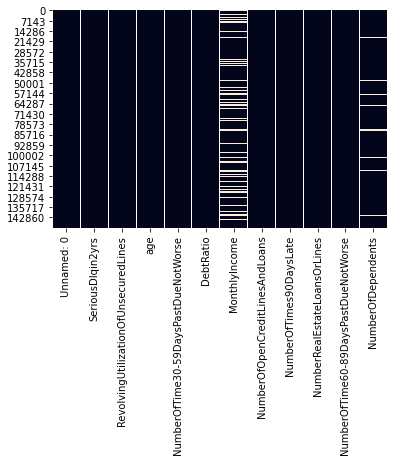

In [7]:
#visualiser les missing values
sns.heatmap(ScoringTraining.isnull(), cbar=False)


<AxesSubplot:>

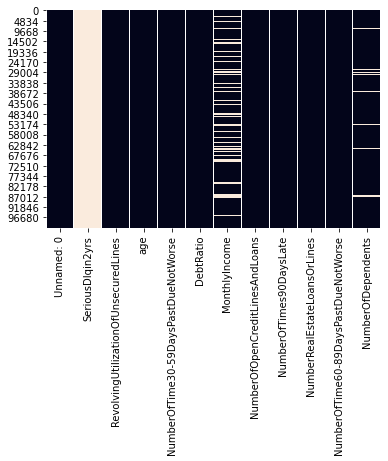

In [8]:
sns.heatmap(ScoringTest.isnull(), cbar=False)

# II)Phase de prétraitement

Proportion de défauts : pourcentage de la moyenne

In [9]:
ScoringTraining.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Diagramme en camembert

In [10]:
from collections import Counter
print(Counter(ScoringTraining['SeriousDlqin2yrs']))

Counter({0: 139974, 1: 10026})


In [11]:
compteur= ScoringTraining.groupby('SeriousDlqin2yrs').agg('count')
print(compteur)

                  Unnamed: 0  RevolvingUtilizationOfUnsecuredLines     age  \
SeriousDlqin2yrs                                                             
0                     139974                                139974  139974   
1                      10026                                 10026   10026   

                  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
SeriousDlqin2yrs                                                    
0                                               139974     139974   
1                                                10026      10026   

                  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
SeriousDlqin2yrs                                                   
0                        111912                           139974   
1                          8357                            10026   

                  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
SeriousDlqin2yrs                                              

In [12]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec


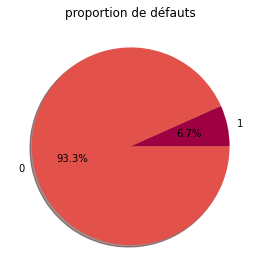

In [13]:
#réaliser un diagramme en camembert
type_labels = compteur.RevolvingUtilizationOfUnsecuredLines.sort_values().index 
type_counts = compteur.RevolvingUtilizationOfUnsecuredLines.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='proportion de défauts')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Retrouver les données extrêmes

<AxesSubplot:xlabel='MonthlyIncome'>

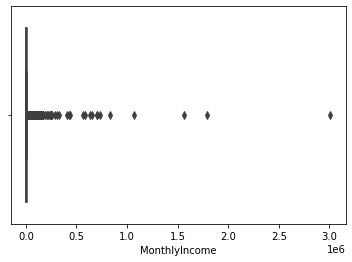

In [14]:
sns.boxplot(x=ScoringTraining['MonthlyIncome'])

<AxesSubplot:xlabel='age'>

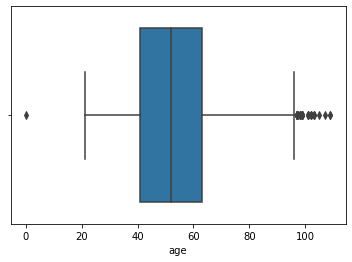

In [15]:
sns.boxplot(x=ScoringTraining['age'])

<AxesSubplot:xlabel='NumberOfDependents'>

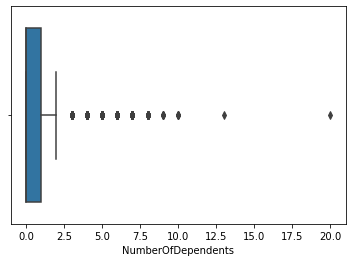

In [16]:
sns.boxplot(x=ScoringTraining['NumberOfDependents'])

# On remplace les valeurs nulles par la moyenne

In [17]:
month_mean= ScoringTraining['MonthlyIncome'].mean()
dep_mean= ScoringTraining['NumberOfDependents'].mean()

In [18]:
df=ScoringTraining
df['MonthlyIncome']=ScoringTraining['MonthlyIncome'].fillna(month_mean)
df['NumberOfDependents']=ScoringTraining['NumberOfDependents'].fillna(dep_mean)

In [19]:
df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Equilibrage des données d’apprentissage :

In [20]:
from collections import Counter
print(Counter(df['SeriousDlqin2yrs']))


Counter({0: 139974, 1: 10026})


# DOWNSAPLING DU DATASET

In [22]:
from sklearn.utils import resample

In [23]:
df_majority = df[df['SeriousDlqin2yrs']==0]
df_minority = df[df['SeriousDlqin2yrs']==1]

In [24]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=7040)

In [25]:
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=7040)

In [26]:
# Combine minority class with downsampled majority class
df_NV = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [27]:
df_NV

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
128072,128073,0,0.000474,62,0,0.272596,4834.000000,8,0,1,0,0.0
73017,73018,0,0.000000,28,0,0.000000,2720.000000,1,0,0,0,0.0
95415,95416,0,0.817318,61,0,0.100959,14916.000000,4,0,0,0,0.0
11616,11617,0,0.821832,43,1,0.880984,5200.000000,11,0,2,0,0.0
65694,65695,0,0.114981,51,0,0.041425,10500.000000,9,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14900,14901,1,1.000000,56,98,0.000000,6670.221237,0,98,0,98,0.0
141170,141171,1,0.006364,77,0,0.304232,3000.000000,22,0,1,0,0.0
100567,100568,1,0.908837,52,1,0.868648,11000.000000,13,0,3,0,4.0
12831,12832,1,0.986115,58,4,0.286603,4500.000000,9,1,1,2,1.0


In [28]:
from collections import Counter
print(Counter(df_NV['SeriousDlqin2yrs']))

Counter({0: 7040, 1: 7040})


In [29]:
df_NV.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000,14080.000000
mean,75069.396378,0.500000,3.424448,49.299290,1.349645,329.478968,6243.231871,8.168537,1.118324,0.996875,0.989062,0.843594
std,43574.698504,0.500018,95.899278,14.366473,8.684720,1335.370177,8647.546698,5.361438,8.686255,1.260846,8.667089,1.150674
min,9.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37616.000000,0.000000,0.071047,38.000000,0.000000,0.182495,3500.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,74554.000000,0.500000,0.433331,49.000000,0.000000,0.397365,5996.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,113225.000000,1.000000,0.941348,59.000000,1.000000,0.875026,6750.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,149979.000000,1.000000,6109.000000,101.000000,98.000000,38793.000000,649587.000000,48.000000,98.000000,29.000000,98.000000,9.000000


On remarque que la nouvelle moyenne est de 0.5 donc on a bien arrivé à faire un downsampling

 Le nouveau jeu de données est équilibré, avec 10026 observations pour chaque classe. 

# Identification des meilleurs prédicteurs parmi les variables : 

Afin d’identifier les meilleures variables dans le modèle de prédiction. On utilisera les boites 
à moustache pour la représentation des variables pour chacune des deux classes 0 et 1: 

<AxesSubplot:xlabel='SeriousDlqin2yrs'>

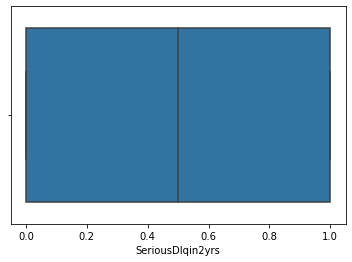

In [30]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>

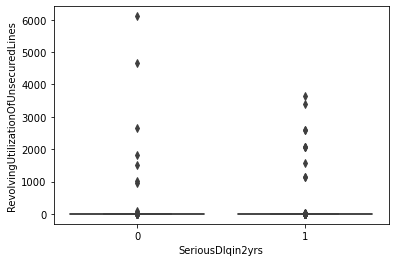

In [31]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['RevolvingUtilizationOfUnsecuredLines'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='age'>

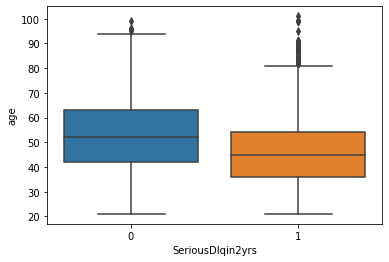

In [32]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['age'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

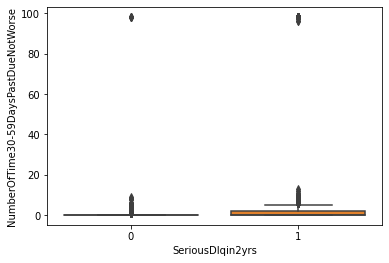

In [33]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['NumberOfTime30-59DaysPastDueNotWorse'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='DebtRatio'>

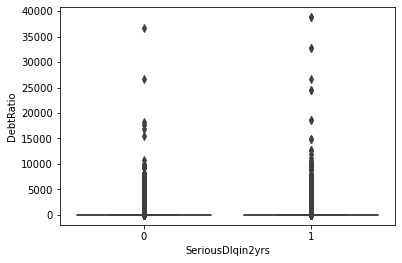

In [34]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['DebtRatio'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='MonthlyIncome'>

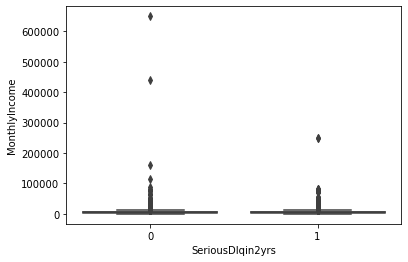

In [35]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['MonthlyIncome'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfOpenCreditLinesAndLoans'>

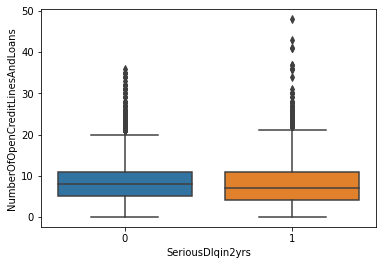

In [36]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['NumberOfOpenCreditLinesAndLoans'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfTimes90DaysLate'>

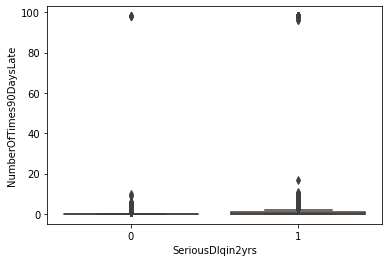

In [37]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['NumberOfTimes90DaysLate'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberRealEstateLoansOrLines'>

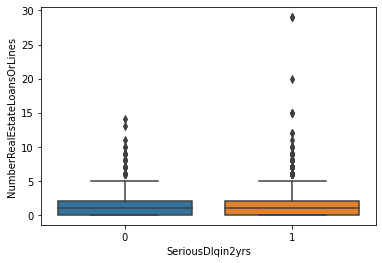

In [38]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['NumberRealEstateLoansOrLines'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfTime60-89DaysPastDueNotWorse'>

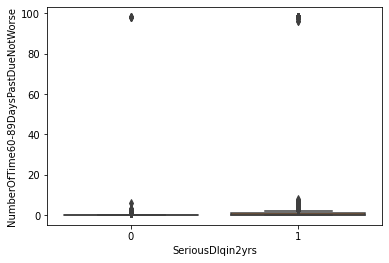

In [39]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['NumberOfTime60-89DaysPastDueNotWorse'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfDependents'>

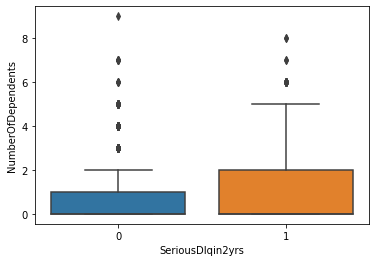

In [40]:
sns.boxplot(x=df_NV['SeriousDlqin2yrs'],y=df_NV['NumberOfDependents'])

La meilleure représentation est celle que présente la classe 0 et 1 avec des 
médianes différentes.


Les meilleures variables qu’on peut utiliser dans le modèle de prédiction sont : 
RevolvingUtilizationOfUnsecuredLines, DebtRatio, age, NumberOfTimes90DaysLate, 
NumberOfTime30.59DaysPastDueNotWorse

# II) Modèles de prévision

In [41]:
df_NV.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
128072,128073,0,0.000474,62,0,0.272596,4834.0,8,0,1,0,0.0
73017,73018,0,0.000000,28,0,0.000000,2720.0,1,0,0,0,0.0
95415,95416,0,0.817318,61,0,0.100959,14916.0,4,0,0,0,0.0
11616,11617,0,0.821832,43,1,0.880984,5200.0,11,0,2,0,0.0
65694,65695,0,0.114981,51,0,0.041425,10500.0,9,0,0,0,1.0


In [42]:
#On exporte le nouveau dataset traité sous forme csv
df_NV.to_csv(r"C:\Users\WIAM\OneDrive\Desktop\CSV\DATA.csv", index = False)

In [45]:
from sklearn.model_selection import train_test_split
csv=pd.read_csv(r"C:\\Users\\WIAM\\OneDrive\\Desktop\\CSV\\DATA.csv")
y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
#On prépare des données de test et données de training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Implémentation du LDA 

Mean Accuracy: 0.630 (0.011)


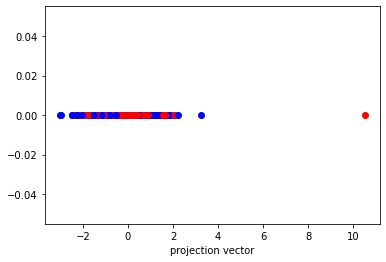

In [46]:
from numpy import mean
from numpy import std
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# define model

model_lda = LDA(n_components=1)
score=model_lda.fit(X_train,y_train).transform(X_train)
y_pred=model_lda.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model (on the prepared data)

scores = cross_val_score(model_lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
#sélection aléatoire de 300 points pour la visualisation 
random_choices=[random.randint(0, len(score) -1)for i in range(0,300) ]
score1=[score[i] for i in random_choices]
y_train1=[y[i] for i in random_choices]
#représentation graphique
for k,i in zip(score1,y_train1):
    if i==1:
        plt.scatter(k,0,c="b")
    else:
        plt.scatter(k,0,c="r")
plt.xlabel("projection vector")
plt.show()




# Implémentation du QDA

In [47]:
from numpy import mean
from numpy import std
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# define model

qda = QuadraticDiscriminantAnalysis()
pred=qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model (on the prepared data)

scores = cross_val_score(pred, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean Accuracy: 0.725 (0.012)


# logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import pandas as pd  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#logistic_reg=LogisticRegression(solver='lbfgs', max_iter=400)
#score=logistic_reg.fit(X_train,y_train)
model2 = LogisticRegression(solver='lbfgs', max_iter=400)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
# Use score method to get accuracy of model
score = model2.score(X_test, y_test)
print(score)

0.7297585227272727


# Phase d'évaluation

1) Goodness of fit 

# LDA : 0.630


# Logistic Regression :0.729

# QDA: 0.725

2) Pouvoir de prédiction

# Random forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=30, random_state=10)
clf.fit(X_train, y_train)
y_pred1=clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7297585227272727


# Pouvoir de prédiction

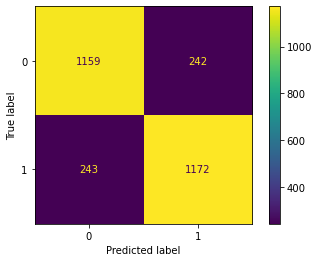

In [56]:
#Random forest 
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)

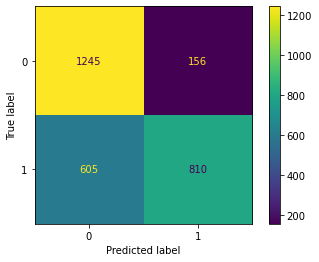

In [57]:
#logistic regression
plot_confusion_matrix(model2,X_test, y_test)

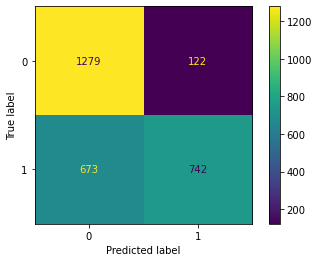

In [59]:
#QDA
plot_confusion_matrix(pred,X_test, y_test)

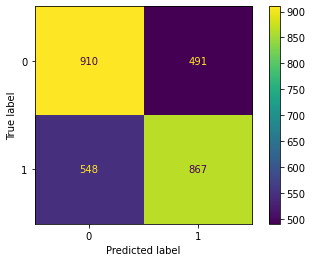

In [58]:
#LDA
plot_confusion_matrix(model_lda,X_test, y_test)